In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

In [2]:
df = pd.read_csv('../data/avatar.csv', encoding = 'unicode_escape').drop(columns=['Unnamed: 0', 'id'])
df.head()

,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
0,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
1,Water,1,The Boy in the Iceberg,1,Scene Description,"As the title card fades, the scene opens onto ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
2,Water,1,The Boy in the Iceberg,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
3,Water,1,The Boy in the Iceberg,1,Scene Description,"The shot pans quickly from the boy to Katara, ...",NaN,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
4,Water,1,The Boy in the Iceberg,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1


In [3]:
speakers = df.groupby(['character']).size().sort_values(ascending=False)

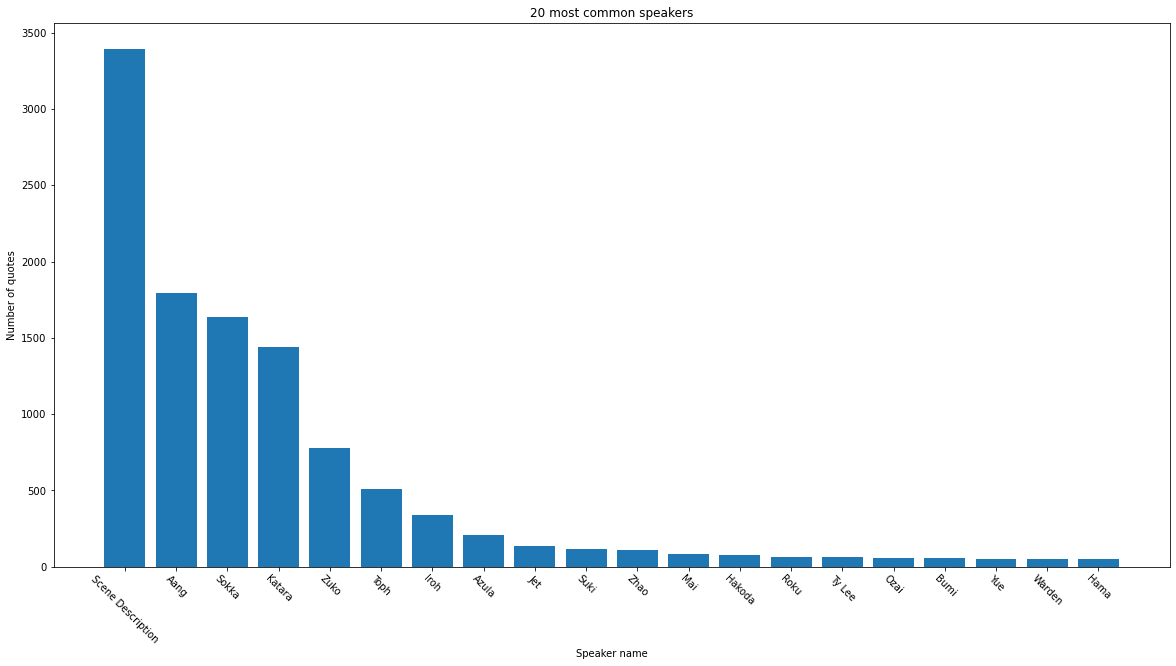

In [4]:
plt.bar(x=speakers.index[:20], height=speakers.values[:20])
plt.xticks(rotation=-45)
plt.title('20 most common speakers')
plt.ylabel('Number of quotes')
plt.xlabel('Speaker name')
plt.show()

# Preprocessing
The plot above shows that there is character named "Scene Description". Scene descriptions are useless for the sake of test (speach) generation. We verify its participation in the whole dataset.

In [5]:
total = df.shape[0]
characters = df[df['character'] != 'Scene Description'].shape[0]
descriptions = df[df['character'] == 'Scene Description'].shape[0]
print(f"{'Total number of expressions:':<30}{total:<10}")
print(f"{'Characters statements:':<30}{characters:<6}( {characters/total * 100:.2f}% )")
print(f"{'Scene descriptions:':<30}{descriptions:<6}( {descriptions/total * 100:.2f}% )")

Total number of expressions:  13385     
Characters statements:        9992  ( 74.65% )
Scene descriptions:           3393  ( 25.35% )



There are also some troublesome characters in the file:

| occurences    | character         |
|---------------|-------------------|
| 1766          | Aang              |
| 2             | Aang and Sokka    |
| 1             | Aang and Zuko     |
| 1             | Aang:             |
| 1             | Actor Bumi        |
| 5             | Actor Iroh        |
| 2             | Actor Jet         |
| 5             | Actor Ozai        |
| 16            | Actor Sokka       |
| 3             | Actor Toph        |
| 14            | Actor Zuko        |
| 19            | Actress Aang      |
| 10            | Actress Azula     |
| 16            | Actress Katara    |

Hence, we perform some preprocessing, consecutively executing the following steps:
1. Drop scene descriptions.
2. Drop statements spoken by more than 1 character - there is no simple way to assign them to the proper character. Thus, to avoid manual labeling we drop them, because there are only few of thems.
3. Lower all character names.
4. Remove tokens like ":", "actor", "actress" from character names.
5. Transform name to upper case.


In [6]:
df = pd.read_csv('../data/avatar.csv', encoding = 'unicode_escape').drop(columns=['Unnamed: 0', 'id'])

In [7]:
df = df[df['character'] != 'Scene Description']
df = df[~df['character'].str.contains('and')]
df['character'] = df['character'].str.lower()
df['character'] = df['character'].str.replace(':|actor|actress', '', regex=True)
df['character'] = df['character'].str.title()
df = df.reset_index()
df = df.drop(columns=['index'])

In [8]:
df

,book,book_num,chapter,chapter_num,character,full_text,character_words,writer,director,imdb_rating
0,Water,1,The Boy in the Iceberg,1,Katara,Water. Earth. Fire. Air. My grandmother used t...,Water. Earth. Fire. Air. My grandmother used t...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
1,Water,1,The Boy in the Iceberg,1,Sokka,It's not getting away from me this time. [Clos...,It's not getting away from me this time. Watc...,"<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
2,Water,1,The Boy in the Iceberg,1,Katara,"[Happily surprised.] Sokka, look!","Sokka, look!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
3,Water,1,The Boy in the Iceberg,1,Sokka,"[Close-up of Sokka; whispering.] Sshh! Katara,...","Sshh! Katara, you're going to scare it away. ...","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
4,Water,1,The Boy in the Iceberg,1,Katara,[Struggling with the water that passes right i...,"But, Sokka! I caught one!","<U+200E>Michael Dante DiMartino, Bryan Konietz...",Dave Filoni,8.1
...,...,...,...,...,...,...,...,...,...,...
9898,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Mai,I look like a man.,I look like a man.,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8
9899,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Suki,And why did you paint me firebending?,And why did you paint me firebending?,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8
9900,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Sokka,I thought it looked more exciting that way. [M...,I thought it looked more exciting that way. O...,"Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8
9901,Fire,3,"Sozin's Comet, Part 4: Avatar Aang",21,Iroh,"[Points at painting.] Hey, my belly's not that...","Hey, my belly's not that big anymore. I've rea...","Aaron Ehasz, Michael Dante DiMartino, Bryan Ko...",Joaquim Dos Santos,9.8


In [9]:
temp_df = df["character_words"].str.lower().str.replace('[^\w\s]','').str.split(expand=True).stack().value_counts().reset_index()

/tmp/ipykernel_12639/1911633456.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  temp_df = df["character_words"].str.lower().str.replace('[^\w\s]','').str.split(expand=True).stack().value_counts().reset_index()


In [10]:
temp_df[0] = temp_df[0] / sum(temp_df[0])

In [11]:
temp_df

,index,0
0,the,0.037336
1,you,0.036469
2,i,0.029746
3,to,0.028004
4,a,0.018392
...,...,...
6525,investigation,0.000009
6526,argument,0.000009
6527,facts,0.000009
6528,furthermore,0.000009
